In [1]:
from functools import reduce
from matplotlib import pyplot as plt
import numpy as np
import optuna
from sklearn.model_selection import KFold
import pandas as pd

In [2]:
df = pd.read_csv('./data/example5.dat', sep='\s+', header=None)
df.columns = ['x', 'y']

In [3]:
df

,x,y
0,-2.00,2.434221
1,-1.99,2.692143
2,-1.98,2.579044
3,-1.97,2.517389
4,-1.96,1.602996
5,-1.95,1.864514
6,-1.94,1.503794
7,-1.93,2.275423
8,-1.92,1.973174
9,-1.91,1.228074


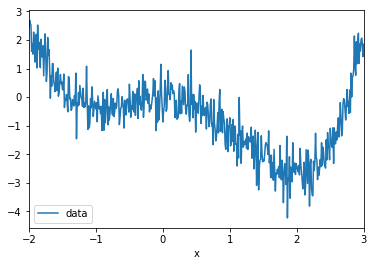

In [4]:
df.plot(x=0, y=1)

plt.legend(['data'])

In [5]:
def least_squared_method(x, y, dim=2, norm=False, norm_eff=1):
    X = np.array([x ** n for n in range(dim + 1)]).T
    Y = y.T
    
    if norm:
        return np.linalg.inv(X.T @ X - norm_eff * np.eye(dim + 1)) @ (X.T @ Y)
    else:
        return np.linalg.inv(X.T @ X) @ (X.T @ Y)

In [34]:
def objective(trial):
    X = df['x'].values
    Y = df['y'].values
    
    dim = trial.suggest_int('dim', 0, 20)
    norm = trial.suggest_categorical('norm', [False, True])
    norm_eff = trial.suggest_uniform('norm_eff', 0, 1000) if norm else 0

    kf = KFold(n_splits=4)

    errors = []
    for train_index, test_index in kf.split(df['x']):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        w = least_squared_method(x_train, y_train, dim=dim, norm=norm, norm_eff=norm_eff)

        pred = sum([w[n] * x_test ** n for n in range(dim + 1)])
        errors.append(sum((y_test - pred) ** 2))

    return sum(errors)

In [35]:
study = optuna.create_study()
study.optimize(objective, n_trials=300)
study.best_params

[I 2019-04-09 22:38:05,565] Finished trial#0 resulted in value: 7239.14649612691. Current best value is 7239.14649612691 with parameters: {'dim': 6, 'norm': False}.
[I 2019-04-09 22:38:05,580] Finished trial#1 resulted in value: 544055044668966.94. Current best value is 7239.14649612691 with parameters: {'dim': 6, 'norm': False}.
[I 2019-04-09 22:38:05,588] Finished trial#2 resulted in value: 106085.01354737766. Current best value is 7239.14649612691 with parameters: {'dim': 6, 'norm': False}.
[I 2019-04-09 22:38:05,602] Finished trial#3 resulted in value: 1721358348730.192. Current best value is 7239.14649612691 with parameters: {'dim': 6, 'norm': False}.
[I 2019-04-09 22:38:05,609] Finished trial#4 resulted in value: 1794.7723022277494. Current best value is 1794.7723022277494 with parameters: {'dim': 2, 'norm': False}.
[I 2019-04-09 22:38:05,625] Finished trial#5 resulted in value: 14814875822366.557. Current best value is 1794.7723022277494 with parameters: {'dim': 2, 'norm': False

[I 2019-04-09 22:38:06,370] Finished trial#48 resulted in value: 150.68399900382852. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:06,412] Finished trial#49 resulted in value: 2870.4496049928634. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:06,442] Finished trial#50 resulted in value: 1794.7723022277494. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:06,458] Finished trial#51 resulted in value: 467848.08367818757. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:06,479] Finished trial#52 resulted in value: 758.0655671197087. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:06,503] Finished trial#53 resulted in value: 7239.14649612691. Current best value is 150.68399900382852 with parameters: {'dim': 4,

[I 2019-04-09 22:38:07,949] Finished trial#96 resulted in value: 309998228.2430747. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:07,991] Finished trial#97 resulted in value: 1794.7723022277494. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:08,029] Finished trial#98 resulted in value: 1139.7043141737258. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:08,063] Finished trial#99 resulted in value: 2891888626.059579. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:08,102] Finished trial#100 resulted in value: 15682.0638324779. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:08,139] Finished trial#101 resulted in value: 531779544422.9947. Current best value is 150.68399900382852 with parameters: {'dim': 4,

[I 2019-04-09 22:38:10,226] Finished trial#144 resulted in value: 467848.08367818757. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:10,285] Finished trial#145 resulted in value: 150.68399900382852. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:10,326] Finished trial#146 resulted in value: 1139.7043141737258. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:10,366] Finished trial#147 resulted in value: 15682.0638324779. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:10,399] Finished trial#148 resulted in value: 150.68399900382852. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:10,429] Finished trial#149 resulted in value: 1794.7723022277494. Current best value is 150.68399900382852 with parameters: {'d

[I 2019-04-09 22:38:12,876] Finished trial#192 resulted in value: 1093.2438761968692. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:12,946] Finished trial#193 resulted in value: 1721358348730.192. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:13,030] Finished trial#194 resulted in value: 1389626.8053025824. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:13,101] Finished trial#195 resulted in value: 351689.3318088198. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:13,173] Finished trial#196 resulted in value: 15682.0638324779. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:13,229] Finished trial#197 resulted in value: 1794.7723022277494. Current best value is 150.68399900382852 with parameters: {'dim

[I 2019-04-09 22:38:16,251] Finished trial#240 resulted in value: 150.68399900382852. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:16,326] Finished trial#241 resulted in value: 150.68399900382852. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:16,410] Finished trial#242 resulted in value: 106085.01354737766. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:16,503] Finished trial#243 resulted in value: 593561506083.9552. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:16,588] Finished trial#244 resulted in value: 2891888626.059579. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:16,704] Finished trial#245 resulted in value: 351689.3318088198. Current best value is 150.68399900382852 with parameters: {'di

[I 2019-04-09 22:38:21,619] Finished trial#288 resulted in value: 1139.7043141737258. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:21,681] Finished trial#289 resulted in value: 150.68399900382852. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:21,740] Finished trial#290 resulted in value: 150.68399900382852. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:21,816] Finished trial#291 resulted in value: 1336.0504349157934. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:21,868] Finished trial#292 resulted in value: 15682.0638324779. Current best value is 150.68399900382852 with parameters: {'dim': 4, 'norm': False}.
[I 2019-04-09 22:38:21,938] Finished trial#293 resulted in value: 7239.14649612691. Current best value is 150.68399900382852 with parameters: {'dim

{'dim': 4, 'norm': False}

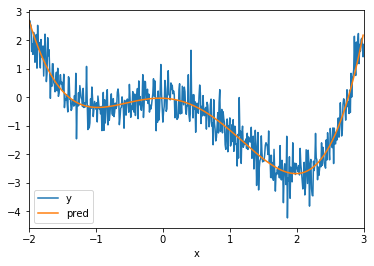

In [42]:
dim = study.best_params['dim']
norm = study.best_params['norm']
norm_eff = study.best_params['norm_eff'] if norm else 0

w = least_squared_method(df['x'], df['y'], dim=dim, norm=norm, norm_eff=norm_eff)
x = np.arange(-2, 3, 0.01)
y = sum([w[n] * x ** n for n in range(dim + 1)])

df.plot(x='x', y='y')
plt.plot(x, y)

plt.legend(['y', 'pred'])